# 3D SARS-CoV-19 Protein Visualisation With Biopython

In [4]:
!pip install biopython
import Bio
import pylab
import urllib
import pandas as pd

!pip install nglview
import nglview as nv
from Bio.Seq import Seq
from Bio.Blast import NCBIWWW
from collections import Counter
from Bio.Data import CodonTable
from Bio import SeqIO, SearchIO
from Bio.PDB import PDBParser,MMCIFParser
from Bio.SeqUtils import GC,molecular_weight

## Attributes of Biopython

In [5]:
# Check Attributes of Biopython
dir(Bio)

['Align',
 'AlignIO',
 'BiopythonDeprecationWarning',
 'BiopythonExperimentalWarning',
 'BiopythonParserWarning',
 'BiopythonWarning',
 'Blast',
 'Data',
 'File',
 'GenBank',
 'MissingExternalDependencyError',
 'MissingPythonDependencyError',
 'Nexus',
 'PDB',
 'SVDSuperimposer',
 'SearchIO',
 'Seq',
 'SeqFeature',
 'SeqIO',
 'SeqRecord',
 'SeqUtils',
 'Sequencing',
 'StreamModeError',
 'SwissProt',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_parent_dir',
 'os',
 'warnings']

## Read FASTA file

#### SEQUENCE SOURCE

<a href="https://www.ncbi.nlm.nih.gov/nuccore/MN908947.3?report=fasta"> **SARS-CoV-19 SEQUENCE FROM NCBI**<a>

### FASTA File

    
**\> Description_of_DNA_sequence**
<br>
ATGCTGCGAGACAGACAGACATACTATCATCTCAGACGCAG<br>
ATGCTGCGAGACAGACAGACATACTATCATCTCAGACGCAG<br>


### Read

In [6]:
#load FASTA file
seq_file_read = SeqIO.read('sequence.fasta', 'fasta')
seq_file_read

SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='MN908947.3', name='MN908947.3', description='MN908947.3 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=[])

In [7]:
#type
type(seq_file_read)

Bio.SeqRecord.SeqRecord

### Sequence details

In [8]:
#list sequence details
seq_file_read.id

'MN908947.3'

In [9]:
#get sequence
seqfromfile = seq_file_read.seq
seqfromfile

Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')

In [10]:
#list sequence details
for record in SeqIO.parse('sequence.fasta', 'fasta'):
    print(record)

ID: MN908947.3
Name: MN908947.3
Description: MN908947.3 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
Number of features: 0
Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')


In [11]:
#store sequence for later analysis
seqfromfile = record.seq
seqfromfile

Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')

In [12]:
#length of sequence
len(seqfromfile)

29903

In [13]:
#molecular weight
molecular_weight(seqfromfile)

9241219.214400413

## Sequence manipulation using Biopython

<div class="alert alert-block alert-warning" style="Font-size:16px">
- indexing/slicing<br>
- concatination<br>
- codon search<br>
- GC content<br>
- complement<br>

</div>

### Indexing / Slicing

In [14]:
#DNA sequence
seqfromfile[0:4]

Seq('ATTA')

### Concatenation

In [15]:
#concatenate
seqfromfile[0:3] + seqfromfile[-3:]

Seq('ATTAAA')

In [16]:
#concatenate
concat = seqfromfile[:6] + seqfromfile[-5:]
concat

Seq('ATTAAAAAAAA')

### Codon Search

In [17]:
#search codon
seqfromfile.find('AGA')

54

### GC Content

In [18]:
#GC content
(seqfromfile.count('G') + seqfromfile.count('C')) / (len(seqfromfile)) * 100

37.97277865097147

In [19]:
#GC content using Biopython
GC(seqfromfile)

37.97277865097148

### Complementary strand

<div class="alert alert-block alert-info" style="Font-size:16px">

In **DNA** <br>
    **A** Bonds with **T** (DOUBLE BOND)<br>
    **G** Bonds with **C** (TRIPLE BOND)<br>
    
</div>

In [20]:
seqfromfile[:11]

Seq('ATTAAAGGTTT')

In [21]:
#complement
seqfromfile[:11].complement()

Seq('TAATTTCCAAA')

In [22]:
#reverse complement
seqfromfile[:11].reverse_complement()

Seq('AAACCTTTAAT')

## Transcription & Translation Studies

<div class="alert alert-block alert-warning" style="font-size:16px">
DNA > RNA = Transcription
</div>
<div class="alert alert-block alert-warning" style="font-size:16px">
mRNA > amino acid (protein) = Translation
</div>

### Transcription

In [23]:
#transcribe
mRNA = seqfromfile.transcribe()
mRNA[:10]

Seq('AUUAAAGGUU')

In [24]:
#back transcribe
mRNA.back_transcribe()

Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')

### Translation

In [25]:
print(CodonTable.unambiguous_dna_by_id[1])

Table 1 Standard, SGC0

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA Stop| A
T | TTG L(s)| TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I   | ACT T   | AAT N   | AGT S   | T
A | ATC I   | ACC T   | AAC N   | AGC S   | C
A | ATA I   | ACA T   | AAA K   | AGA R   | A
A | ATG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V   | GCG A   | GAG E   | GGG G   | G
--+---------

In [26]:
#translation
protein_seq = seqfromfile.translate()
protein_seq[:10]

/usr/local/lib/python3.7/dist-packages/Bio/Seq.py:2983: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


Seq('IKGLYLPR*Q')

In [27]:
len(protein_seq)

9967

In [28]:
len(seqfromfile)

29903

### Can protein sequences be reverse translated ?
<div class="alert alert-block alert-info">
<b>Note</b> : there is no function called `back_translate` so we'll make use of `back_transcribe`.
</div>

In [29]:
#back transcribe
protein_seq.back_transcribe()

Seq('IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QD...KKK')

### This error is true for all the biological life too...
<div class="alert alert-block alert-warning">
- we can't perform an exact "reverse translation" of course, since several amino acids are produced by the same codon.
</div>

In [30]:
#codon table
print(CodonTable.unambiguous_dna_by_id[1])

Table 1 Standard, SGC0

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA Stop| A
T | TTG L(s)| TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I   | ACT T   | AAT N   | AGT S   | T
A | ATC I   | ACC T   | AAC N   | AGC S   | C
A | ATA I   | ACA T   | AAA K   | AGA R   | A
A | ATG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V   | GCG A   | GAG E   | GGG G   | G
--+---------

In [31]:
#list the most common amino acids
common_amino = Counter(protein_seq)
common_amino.most_common(10)

[('L', 886),
 ('S', 810),
 ('*', 774),
 ('T', 679),
 ('C', 635),
 ('F', 593),
 ('R', 558),
 ('V', 548),
 ('Y', 505),
 ('N', 472)]

Text(0.5, 1.0, 'Protein Sequence Frequency')

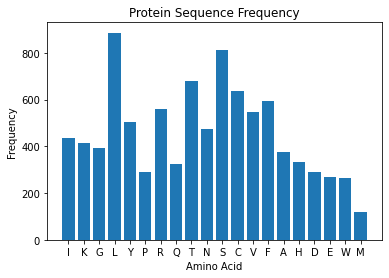

In [32]:
#delete stop codon
del common_amino['*']

#visualize all 20 amino acid occurrences in the form of a histogram
pylab.bar(common_amino.keys(), common_amino.values())
pylab.xlabel('Amino Acid')
pylab.ylabel('Frequency')
pylab.title('Protein Sequence Frequency')

### Since stop codon * signifies end of a protein we can split the sequence using ( * )

In [33]:
#split sequence
protein_list = [str(i) for i in protein_seq.split('*')]
protein_list[:10]

['IKGLYLPR',
 'QTNQLSISCRSVL',
 'TNFKICVAVTRLHA',
 'CTHAV',
 'LITNYCR',
 'QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER',
 'DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS',
 'RWHLWLSRS',
 'KRRFAST',
 'TALCVHQTFGCSNCTSWSCYG']

In [34]:
#convert sequences to dataframe
large_proteins = [x for x in protein_list if len(x)>10]
df = pd.DataFrame({'protein_seq':large_proteins})
df

,protein_seq
0,QTNQLSISCRSVL
1,TNFKICVAVTRLHA
2,QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER
3,DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS
4,TALCVHQTFGCSNCTSWSCYG
...,...
185,FLQTIATIHEQC
186,LNSGLNSCRPHKADGLYKRFRFSVYDI
187,SHIAIFNQCVTLGRT
188,KSHHIFTEATRSTIECTVNNARESCLYGRALMCKINFSSAIPM


In [35]:
#add a column with sequence lengths
df['length'] = df['protein_seq'].apply(len)
df.head()

,protein_seq,length
0,QTNQLSISCRSVL,13
1,TNFKICVAVTRLHA,14
2,QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER,35
3,DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS,46
4,TALCVHQTFGCSNCTSWSCYG,21


In [36]:
#sort sequence data
df.sort_values(by=['length'], ascending=False)[:10]

,protein_seq,length
118,CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFL...,2701
157,ASAQRSQITLHINELMDLFMRIFTIGTVTLKQGEIKDATPSDFVRA...,290
168,TNMKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNS...,123
158,AQADEYELMYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALR...,83
167,QQMFHLVDFQVTIAEILLIIMRTFKVSIWNLDYIINLIIKNLSKSL...,63
3,DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS,46
93,TMLRCYFPKCSEKNNQGYTPLVVTHNFDFTFSFSPEYSMVFVLFFV,46
188,KSHHIFTEATRSTIECTVNNARESCLYGRALMCKINFSSAIPM,43
116,DVVYTHWYWSGNNSYTGSQYGSRILWWCIVLSVLPLPHRSSKS,43
182,LQTLAANCTICPQRFSVLRNVAHWHGSHTFGNVVDLHRCHQIG,43


In [37]:
#take a single protein from the table
one_large_protein = df.nlargest(1, 'length')
single_protein = one_large_protein.iloc[0, 0]
single_protein

'CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNCCRFQEKDEDDNLIDSYFVVKRHTFSNYQHEETIYNLLKDCPAVAKHDFFKFRIDGDMVPHISRQRLTKYTMADLVYALRHFDEGNCDTLKEILVTYNCCDDDYFNKKDWYDFVENPDILRVYANLGERVRQALLKTVQFCDAMRNAGIVGVLTLDNQDLNGNWYDFGDFIQTTPGSGVPVVDSYYSLLMPILTLTRALTAESHVDTDLTKPYIKWDLLKYDFTEERLKLFDRYFKYWDQTYHPNCVNCLDDRCILHCANFNVLFSTVFPPTSFGPLVRKIFVDGVPFVVSTGYHFRELGVVHNQDVNLHSSRLSFKELLVYAADPAMHAASGNLLLDKRTTCFSVAALTNNVAFQTVKPGNFNKDFYDFAVSKGFFKEGSSVELKHFFFAQDGNAAISDYDYYRYNLPTMCDIRQLLFVVEVVDKYFDCYDGGCINANQVIVNNLDKSAGFPFNKWGKARLYYDSMSYEDQDALFAYTKRNVIPTITQMNLKYAISAKNRARTVAGVSICSTMTNRQFHQKLLKSIAATRGATVVIGTSKFYGGWHNMLKTVYSDVENPHLMGWDYPKCDRAMPNMLRIMASLVLARKHTTCCSLSHRFYRLANECAQVLSEMVMCGGSLYVKPGGTSSGDATTAYANSVFNICQAVTANVNALLSTDGNKIADKYVRNLQHRLYECLYRNRDVDTDFVNEFYAYLRKHFSMMILSDDAVVCFNSTYASQGLVASIKNFKSVLYYQNNVFMSEAKCWTETDLTKGPHEFCSQHTMLVKQGDDYVYLPYPDPSRILGAGCFVDDIVKTDGTLMIERFVSLAIDAYPLTKHPNQEYADVFHLYLQYIRKLHDELTGHMLDMYSVMLTNDNTSRYWEPEFYEAMYTPHTVLQAVGACVLCNSQTSLRCGACIRRPFLCCKCCYDHVISTSHKLVLSVNPYVCNAPGCDVTDVTQLYLGGMSY

In [38]:
#write to a file
with open('single_protein.fasta', 'w') as file:
    file.write('>large protein \n' + single_protein)

## Basic Local Alignment Using NCBI-BLAST

In [39]:
#read single_seq.fasta
read = SeqIO.read('single_protein.fasta', 'fasta')
read.seq

Seq('CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNCCRFQ...VNN')

In [40]:
%%time

#based on the server load this query might take 2-3 minutes to run
result_handle = NCBIWWW.qblast('blastp', 'pdb', read.seq)
blast_qresult = SearchIO.read(result_handle, 'blast-xml')

CPU times: user 295 ms, sys: 46.4 ms, total: 342 ms
Wall time: 1min 1s


In [57]:
blast_qresult

QueryResult(id='unnamed', 50 hits)

In [41]:
#blast result
print(blast_qresult[0:5])

Program: blastp (2.12.0+)
  Query: unnamed (2701)
         protein product
 Target: pdb
   Hits: ----  -----  ----------------------------------------------------------
            #  # HSP  ID + description
         ----  -----  ----------------------------------------------------------
            0      1  pdb|7D4F|A  Chain A, RNA-directed RNA polymerase [Sever...
            1      1  pdb|6YYT|A  Structure of replicating SARS-CoV-2 polymer...
            2      1  pdb|6XEZ|A  Chain A, RNA-directed RNA polymerase [Sever...
            3      1  pdb|7BW4|A  Chain A, RNA-directed RNA polymerase [Sever...
            4      1  pdb|6XQB|A  Chain A, RNA-directed RNA polymerase [Sever...


In [55]:
#fetch the id, description, evalue, bitscore & alignment of second hit for SARS-CoV-2
seqid = blast_qresult[1]

details = seqid[0]

print(f"\
Sequence ID:{seqid.id}\n\
description:{seqid.description}\n\
E value:    {details.evalue} \n\
Bit Score:  {details.bitscore}\n\")

Sequence ID:pdb|6YYT|A
description:Structure of replicating SARS-CoV-2 polymerase [Severe acute respiratory syndrome coronavirus 2]
E value:    0.0 
Bit Score:  1938.31



In [56]:
#alignment detail
print(f"alignment:\n{details.aln}")

alignment:
Alignment with 2 rows and 925 columns
FKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKT...VLQ unnamed
LNRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKT...VLQ pdb|6YYT|A


## Reading PDB file

### Retreiving PDB Structure From RCSB PDB

In [62]:
seqid.id

'pdb|6YYT|A'

In [63]:
# split seqid
seqid.id.split('|')

['pdb', '6YYT', 'A']

In [64]:
seqid.id.split('|')[1]

'6YYT'

In [66]:
#link format https://files.rcsb.org/download/6YYT.pdb
urllib.request.urlretrieve('https://files.rcsb.org/download/6YYT.pdb', '6YYT.pdb')

('6YYT.pdb', <http.client.HTTPMessage at 0x7f9b3b5d2250>)

### Read PDB file

In [65]:
#read pdb file
parser = PDBParser()
structure = parser.get_structure('6YYT', '6YYT.pdb')
structure

/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12059.
  PDBConstructionWarning,


<Structure id=6YYT>

In [70]:
structure[0]

<Model id=0>

### Identify the number of chains

In [49]:
#identify number of chains
for chain in structure[0]:
    print(f'chain ID: {chain.id}')

chain ID: A
chain ID: B
chain ID: C
chain ID: D
chain ID: P
chain ID: Q
chain ID: T
chain ID: U


## Visualizing SARS-CoV-19 Protein structure

### nglview

In [50]:
nv.demo()

NGLWidget()

In [51]:
view = nv.show_biopython(structure)
view

NGLWidget()

In [52]:
view.render_image()

Image(value=b'', width='99%')

### nglview GUI

In [53]:
#GUI
nv.show_biopython(structure, gui=True)

NGLWidget()

## Observation:<br>
<div style="Font-size:16px">
A. Length 29903 base pairs<br>
B. GC content 37.97<br>
C. Protein content has high L & the largest protein is of length 2701 Amino acid<br>
D. Largest protein BLAST results corresponds to <b>SARS-CoV-19</b> 6YYT <br>
E. Protein 6YYT has 8 chains & a DNA binding domain<br>
</div>